# PyPSA-GB: Network Data

This notebook explores the reduced network model included with PyPSA-GB. The reduced network model is a 29 bus and 99 line representation of the high voltage AC transmission network of the Great Britain (GB) electricity system. It has been adapted from the openly available Reduced GB Network which was developed at the University of Strathclyde in 2010 (https://www.maths.ed.ac.uk/optenergy/NetworkData/reducedGB/). The main change is the addition of the Western HVDC link which strengthens the connection between Scotland and England.

Interconnections to other countries are also included for historical years 

## Voronoi cells

Generators are connected to the buses by calculating the nearest bus by distance. Voronoi cells have been generated for the diagram below to illustrate the areas which correspond to the nearest bus.

![title](voronoi_reduced_model.jpg)

## Reduced Network GB

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature

import imageio

from scipy.spatial import Voronoi, voronoi_plot_2d
from shapely.geometry import Polygon, Point

from statistics import mean

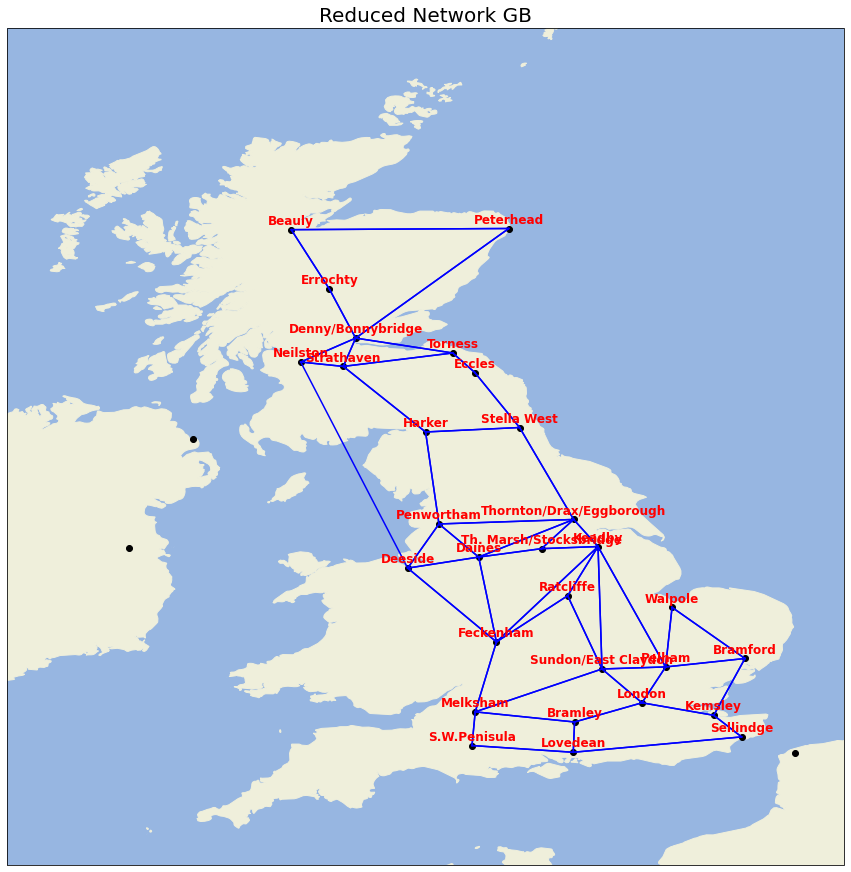

In [47]:
df_network = pd.read_csv('data/network/buses.csv')
lon = df_network['x'].values
lat = df_network['y'].values
coordinates = np.zeros(shape=(len(lon), 2))
for i in range(len(lon)):
    coordinates[i][0] = lon[i]
    coordinates[i][1] = lat[i]

df_lines = pd.read_csv('data/network/lines.csv', index_col=0)
df_buses = pd.read_csv('data/network/buses.csv', index_col=0)

line_coordinates = []
for i in range(len(df_lines['bus0'].values)):

    bus0 = df_lines['bus0'].iloc[i]
    bus1 = df_lines['bus1'].iloc[i]
    bus0_coord = [df_buses['x'][bus0], df_buses['y'][bus0]]
    bus1_coord = [df_buses['x'][bus1], df_buses['y'][bus1]]
    line_coordinates.append([bus0_coord, bus1_coord])

fig = plt.figure()
fig.set_size_inches(15, 17)
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())

extent = [-8.09782, 2.40511, 60, 49.5]
ax.set_extent(extent)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)


for i in range(len(df_lines['bus0'].values)):
    ax.plot([line_coordinates[i][0][0], line_coordinates[i][1][0]],
            [line_coordinates[i][0][1], line_coordinates[i][1][1]],
            c='blue')

# ax.scatter(lon, lat, s=sizes * marker_scaler, c='black', edgecolors='black')
ax.scatter(lon, lat, c='black', edgecolors='black')
for i, txt in enumerate(df_buses[:29].index):
    ax.annotate(txt, (lon[i], lat[i]),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center',
                fontweight='extra bold',
                color='red',
                fontsize='large')

ax.set_title('Reduced Network GB', fontsize=20)

plt.show()

Bus data...

In [31]:
df_buses.iloc[:29, :]

,v_nom,carrier,x,y
name,,,,
Beauly,275,AC,-4.533299,57.469876
Peterhead,275,AC,-1.804331,57.484481
Errochty,132,AC,-4.054907,56.724571
Denny/Bonnybridge,275,AC,-3.725282,56.109237
Neilston,400,AC,-4.414788,55.808831
Strathaven,400,AC,-3.880268,55.753988
Torness,400,AC,-2.507448,55.922401
Eccles,400,AC,-2.229827,55.677255
Harker,400,AC,-2.847820,54.931176


Line data...

In [32]:
df_lines

,bus0,bus1,r,x,b,s_nom
name,,,,,,
0,Beauly,Peterhead,0.01220,0.02000,0.0856,525
1,Beauly,Errochty,0.00700,0.15000,0.0520,132
2,Beauly,Peterhead,0.01220,0.02000,0.2844,525
3,Beauly,Errochty,0.00700,0.15000,0.0520,132
4,Peterhead,Denny/Bonnybridge,0.00040,0.06500,0.4454,760
...,...,...,...,...,...,...
94,Sellindge,Kemsley,0.00020,0.00503,0.1797,3100
95,Lovedean,Sellindge,0.00038,0.00711,0.2998,3070
96,Lovedean,Sellindge,0.00038,0.00711,0.2998,3070


## Interconnectors

Interconnectors <= 2020...

In [34]:
df_interconnectors = pd.read_csv('data/interconnectors/links.csv', index_col=0)
df_interconnectors

,bus0,bus1,carrier,p_nom
name,,,,
BritNed,Netherlands,Kemsley,DC,1000
EastWest,Ireland,Deeside,DC,600
Moyle,N. Ireland,Neilston,DC,600
Nemo,Belgium,Sellindge,DC,1000
IFA,France1,Sellindge,DC,2000
IFA2,France2,Lovedean,DC,1000


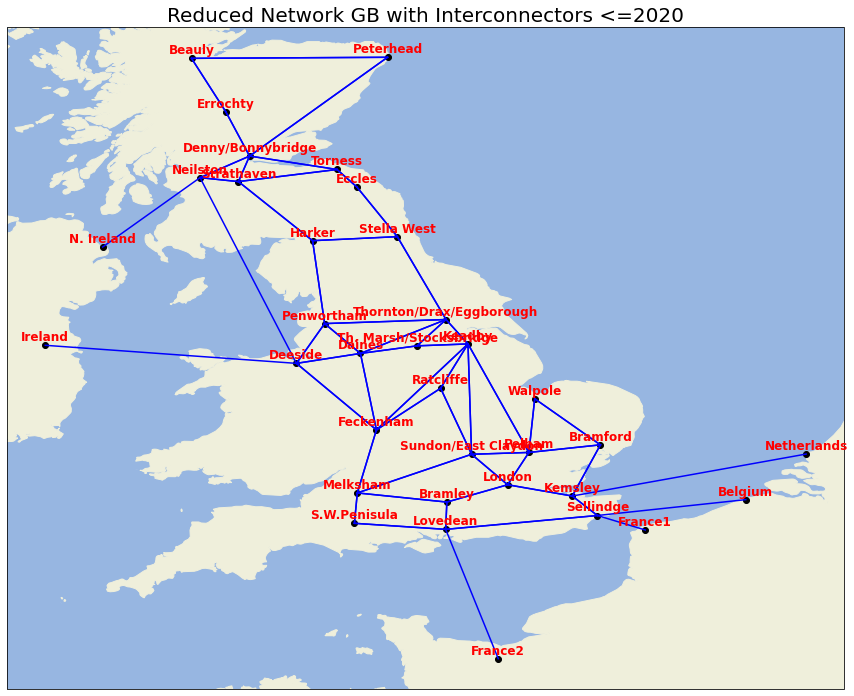

In [48]:
df_lines = pd.read_csv('data/network/lines.csv', index_col=0)
df_buses = pd.read_csv('data/network/buses.csv', index_col=0)

# append the interconnector data
df_lines_interconnectors = df_lines.append(df_interconnectors)

line_coordinates = []
for i in range(len(df_lines_interconnectors['bus0'].values)):

    bus0 = df_lines_interconnectors['bus0'].iloc[i]
    bus1 = df_lines_interconnectors['bus1'].iloc[i]
    bus0_coord = [df_buses['x'][bus0], df_buses['y'][bus0]]
    bus1_coord = [df_buses['x'][bus1], df_buses['y'][bus1]]
    line_coordinates.append([bus0_coord, bus1_coord])

line_coordinates

fig = plt.figure()
fig.set_size_inches(15, 17)
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)


for i in range(len(df_lines_interconnectors['bus0'].values)):
    ax.plot([line_coordinates[i][0][0], line_coordinates[i][1][0]],
            [line_coordinates[i][0][1], line_coordinates[i][1][1]],
            c='blue')

# ax.scatter(lon, lat, s=sizes * marker_scaler, c='black', edgecolors='black')
ax.scatter(lon, lat, c='black', edgecolors='black')
for i, txt in enumerate(df_buses.index):
    ax.annotate(txt, (lon[i], lat[i]),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center',
                fontweight='extra bold',
                color='red',
                fontsize='large')

ax.set_title('Reduced Network GB with Interconnectors <=2020', fontsize=20)

plt.show()

In [49]:
df_interconnectors_future = pd.read_csv('data/interconnectors/links_future.csv', index_col=0)
df_interconnectors_future

,bus0,bus1,carrier,p_nom,installed date,marginal_cost
name,,,,,,
BritNed,Netherlands,Kemsley,DC,1000,01/01/2020,0
EastWest,Ireland,Deeside,DC,600,01/01/2020,0
Moyle,N. Ireland,Neilston,DC,600,01/01/2020,0
Nemo,Belgium,Sellindge,DC,1000,01/01/2020,0
IFA,France1,Sellindge,DC,2000,01/01/2020,0
IFA2,France2,Lovedean,DC,1000,01/01/2020,0
NSL,Norway,Stella West,DC,1400,01/01/2021,0
ElecLink,France1,Sellindge,DC,1000,01/01/2022,0
Viking Link,Denmark,Walpole,DC,1400,01/01/2023,0


39


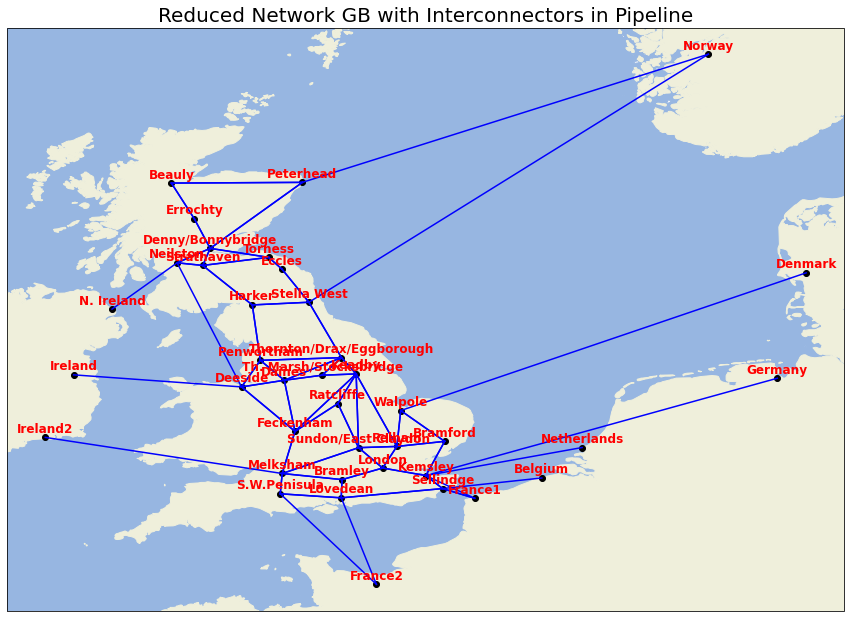

In [56]:
df_lines = pd.read_csv('data/network/lines.csv', index_col=0)
df_buses = pd.read_csv('data/network/buses.csv', index_col=0)

# append new buses
df_buses_future = pd.read_csv('data/interconnectors/links_new_buses.csv', index_col=0)
df_buses = df_buses.append(df_buses_future)
lon = df_buses['x'].values
lat = df_buses['y'].values
print(len(df_buses))

# append the interconnector data
df_lines_interconnectors = df_lines.append(df_interconnectors_future)

line_coordinates = []
for i in range(len(df_lines_interconnectors['bus0'].values)):

    bus0 = df_lines_interconnectors['bus0'].iloc[i]
    bus1 = df_lines_interconnectors['bus1'].iloc[i]
    bus0_coord = [df_buses['x'][bus0], df_buses['y'][bus0]]
    bus1_coord = [df_buses['x'][bus1], df_buses['y'][bus1]]
    line_coordinates.append([bus0_coord, bus1_coord])

line_coordinates

fig = plt.figure()
fig.set_size_inches(15, 25)
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)


for i in range(len(df_lines_interconnectors['bus0'].values)):
    ax.plot([line_coordinates[i][0][0], line_coordinates[i][1][0]],
            [line_coordinates[i][0][1], line_coordinates[i][1][1]],
            c='blue')

# ax.scatter(lon, lat, s=sizes * marker_scaler, c='black', edgecolors='black')
ax.scatter(lon, lat, c='black', edgecolors='black')
for i, txt in enumerate(df_buses.index):
    ax.annotate(txt, (lon[i], lat[i]),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center',
                fontweight='extra bold',
                color='red',
                fontsize='large')

ax.set_title('Reduced Network GB with Interconnectors in Pipeline', fontsize=20)

plt.show()